<a href="https://colab.research.google.com/github/Kirtiwardhan01/Paraquantum-/blob/main/Predicting_Sarcasm_in_Text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting Sarcasm in Text Part 1**


## **it_nlunlpdj_04_enus_06**

What you will learn & explore in this section: 

- Importing Relevant Libraries 
- Data Loading through Local file 
- Basic Overview of the data

### Library Import

In [64]:
#Importing relevant libraries and packages
import numpy as np             
import pandas as pd           
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

### Data Loading through local file

In [67]:
# Loading the json file 
data_path = "/content/sarcastic file.json"
data = pd.read_json(data_path, lines=True)

### Basic Overview of the dataset


**Problem Statement**: The dataset provided is related to headlines that consists 3 attributes with 28619 records

**Column Descriptions**

**is_sarcastic**: 1 if the record is sarcastic otherwise 0

**headline**: the headline of the news article

**article_link**: link to the original news article. Useful in collecting supplementary data

# **Predicting Sarcasm in Text Part II**


## **it_nlunlpdj_04_enus_07**

### Explorarotry Data Analysis (EDA) of Data

In [68]:
#Exploring the dataset
data.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headline      28619 non-null  object
 2   article_link  28619 non-null  object
dtypes: int64(1), object(2)
memory usage: 670.9+ KB


There are no missing values in any columns of the dataset 
There are 28619 rows and 3 columns

In [72]:
#To check shape of the dataset
data.shape 

(28619, 3)

In [70]:
#Descriptive Statistics
data.describe()

,is_sarcastic
count,28619.000000
mean,0.476397
std,0.499451
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [73]:
#If we need to check the unique values in the column is_sarcastic
data.is_sarcastic.unique() 

array([1, 0])

In [74]:
#To check no. of unique values 
data.is_sarcastic.value_counts() 

0    14985
1    13634
Name: is_sarcastic, dtype: int64

In [75]:
#Here we are adding another column and dropping 'article_link' column
data['source'] = data.article_link.apply(lambda x: x.split('.')[1])
data = data.drop('article_link', axis=1)
data.shape

(28619, 3)

In [76]:
#Rechecking the dataset
data.head()

,is_sarcastic,headline,source
0,1,thirtysomething scientists unveil doomsday clo...,theonion
1,0,dem rep. totally nails why congress is falling...,huffingtonpost
2,0,eat your veggies: 9 deliciously different recipes,huffingtonpost
3,1,inclement weather prevents liar from getting t...,theonion
4,1,mother comes pretty close to using word 'strea...,theonion


In [78]:
data.source.unique()

array(['theonion', 'huffingtonpost'], dtype=object)

In [79]:
data.source.value_counts()

huffingtonpost    14985
theonion          13634
Name: source, dtype: int64

Classes of **is_sarcastic** column are well-balanced and there are no nulls

In [81]:
total_words = data['headline'].str.split(expand=True).unstack().value_counts()

In [82]:
all=pd.DataFrame(total_words).reset_index()

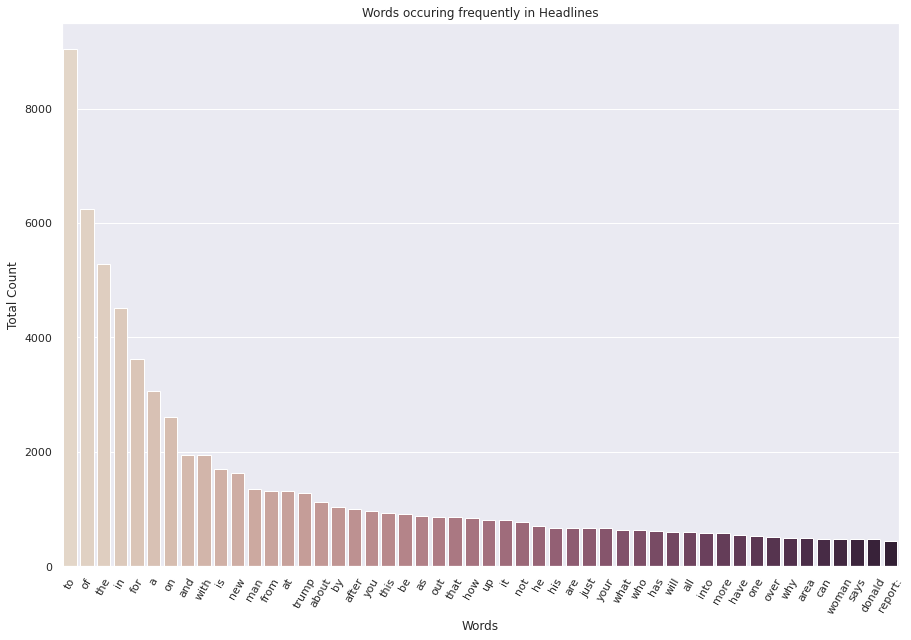

In [88]:
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(x=all['index'][0:50], y=all[0][0:50], data=all,palette="ch:.20")
plt.xlabel('Words')  
plt.ylabel('Total Count') 
plt.title("Words occuring frequently in Headlines") 
plt.xticks(rotation=60);

In [89]:
total_words = data['headline'].str.split(expand=True).unstack().value_counts()

In [91]:
not_sarcastic=pd.DataFrame(data[data['is_sarcastic']==0]['headline'].str.split(expand=True).unstack().value_counts()).reset_index()

In [92]:
sarcastics=pd.DataFrame(data[data['is_sarcastic']==1]['headline'].str.split(expand=True).unstack().value_counts()).reset_index()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text major ticklabel objects>)

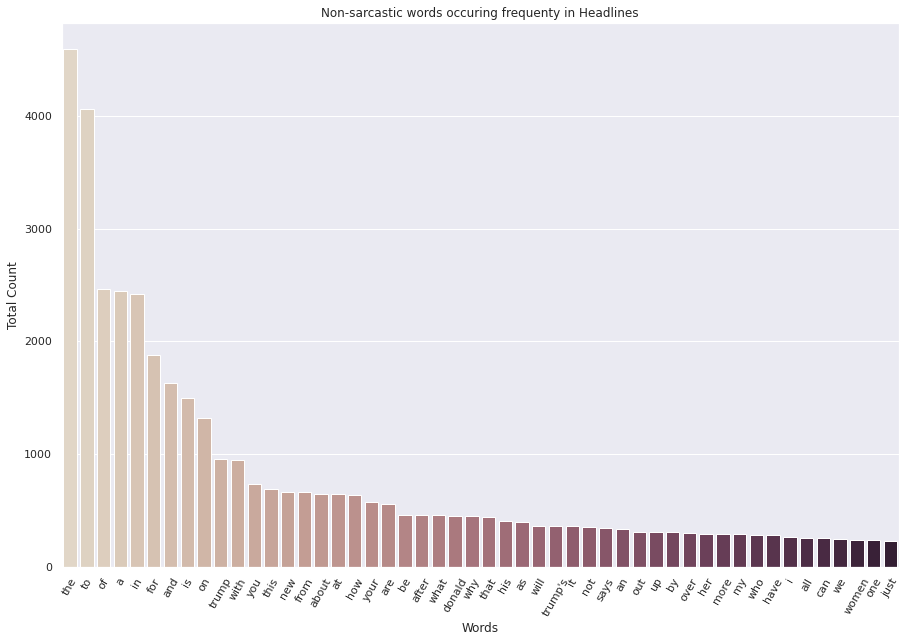

In [97]:
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(x=not_sarcastic['index'][0:50], y=not_sarcastic[0][0:50], data=not_sarcastic,palette="ch:.25")
plt.xlabel('Words')  
plt.ylabel('Total Count')  
plt.title("Non-sarcastic words occuring frequenty in Headlines") 
plt.xticks(rotation=60)

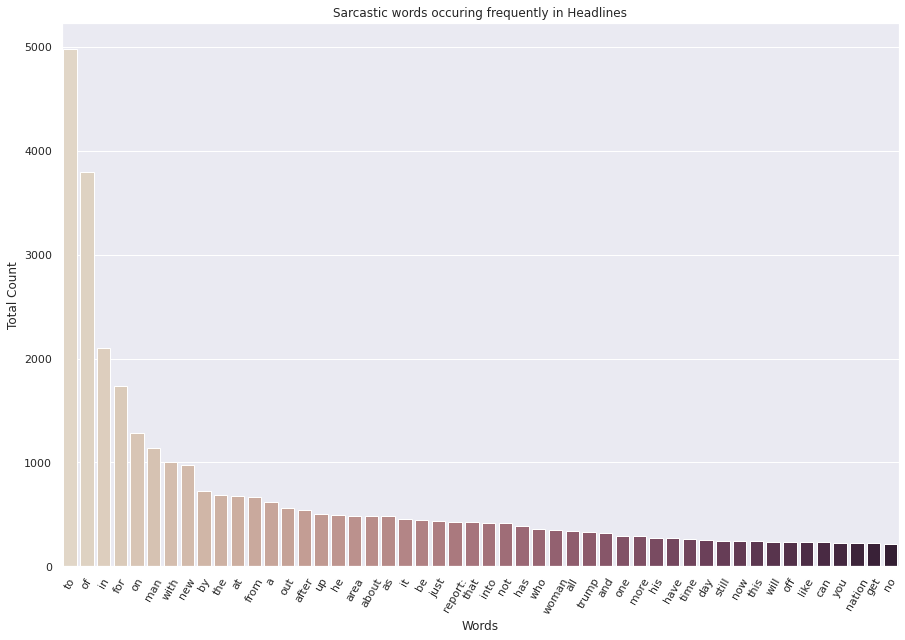

In [98]:
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(x=sarcastics['index'][0:50], y=sarcastics[0][0:50], data=sarcastics,palette="ch:.25")
plt.xlabel('Words')  
plt.ylabel('Total Count')  
plt.title("Sarcastic words occuring frequently in Headlines") 
plt.xticks(rotation=60);

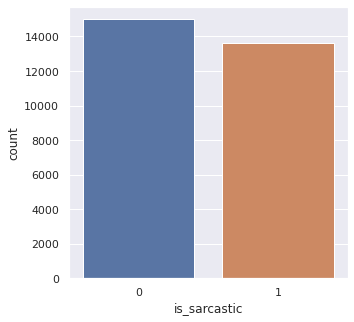

In [124]:
#Let's check the count of sarcastic words
plt.figure(figsize=(5,5))
sns.countplot(x='is_sarcastic', data=data);

# **Predicting Sarcasm in Text Part III**


## **it_nlunlpdj_04_enus_08**

### Exploring Linguistic Features of Data

#### Removing Stop Words 

In [100]:
#Importing relevant nltk library
import nltk
nltk.download('stopwords')
nltk.download("wordnet")
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [102]:
stopwords = nltk.corpus.stopwords.words('english')

In [105]:
sarcastic2=[each_word.lower() for each_word in sarcastics['index']] 

In [106]:
sarcastic_nostop = [word for word in sarcastic2 if word not in stopwords]

In [107]:
not_sarcastic2=[each_word.lower() for each_word in not_sarcastic['index']]

In [108]:
not_sarcastic_nostop = [word for word in not_sarcastic2 if word not in stopwords]

#### Visualising with the help of WordCloud

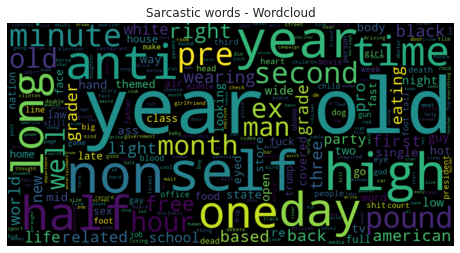

In [109]:
from wordcloud import WordCloud, ImageColorGenerator

plt.figure(figsize = (8,8))
wc = WordCloud(width = 1000 , height = 500 , max_words = 300).generate(' '.join(word for word in sarcastic_nostop))
plt.axis("off")
plt.title('Sarcastic words - Wordcloud')
plt.imshow(wc, interpolation = 'bilinear')

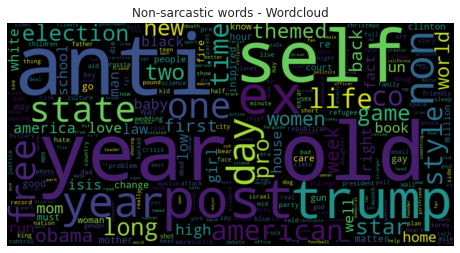

In [111]:
plt.figure(figsize = (8,8))
wc = WordCloud(width = 1000 , height = 500 , max_words = 300).generate(' '.join(word for word in not_sarcastic_nostop))
plt.axis("off")
plt.title('Non-sarcastic words - Wordcloud')
plt.imshow(wc , interpolation = 'bilinear')

Comparing the lengths of sarcastic and non-sarcastic headlines

In [114]:
data['text_len'] = data['headline'].apply(lambda x: len(x.split(' ')))
data[data['text_len']>130]

,is_sarcastic,headline,source,text_len
7302,1,hot wheels ranked number one toy for rolling d...,theonion,151


In [115]:
data['headline'][7302]

'hot wheels ranked number one toy for rolling down ramp, knocking over dominoes that send marble down a funnel, dropping onto teeter-totter that yanks on string, causing pulley system to raise wooden block, propelling series of twine rollers that unwind spring, launching tennis ball across room, inching tire down slope until it hits power switch, activating table fan that blows toy ship with nail attached to it across kiddie pool, popping water balloon that fills cup, weighing down lever that forces basketball down track, nudging broomstick on axis to rotate, allowing golf ball to roll into sideways coffee mug, which tumbles down row of hardcover books until handle catches hook attached to lever that causes wooden mallet to slam down on serving spoon, catapulting small ball into cup attached by ribbon to lazy susan, which spins until it pushes d battery down incline plane, tipping over salt shaker to season omelet'

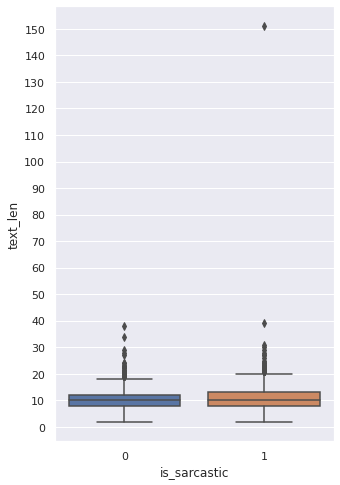

In [119]:
plt.figure(figsize = (5 ,8))
sns.boxplot(y='text_len', x="is_sarcastic", data=data)
y=data['text_len']
plt.yticks(np.arange(0, max(y), 10));

There are some differences between sarcastic and non-sarcastic classes in the length of headlines 

Non-sarcastic headlines are more similar in the length, whereas the longest headings tend to be satirical

# **Predicting Sarcasm in Text Part IV**


## **it_nlunlpdj_04_enus_09**

### Feature Engineering on Data 

Parse the data removing stopwords and non-alpha-numeric characters and words containing them from the headlines


In [128]:
import re
def parser(x):
    x = re.sub('[^a-z\s]', '', x.lower())  #drop any symbol except a-z
    x = [w for w in x.split() if w not in set(stopwords)]
    x = [w for w in x if wordnet.synsets(w)]
    return ' '.join(x)

data['headline'] = data.headline.apply(lambda x: parser(x))


In [130]:
# Separating the features and labels
X = data['headline']
y = data['is_sarcastic']

In [131]:
#Splitting the dataset into Training and Test data

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)


In [132]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(ngram_range=(1,3))
X_cv_train = cv.fit_transform(X_train)
X_cv_test = cv.transform(X_test)

# **Predicting Sarcasm in Text Part V**

## **it_nlunlpdj_04_enus_10**

### Simple Model Building & Evaulation 

Decision Tree

In [140]:
# Importing the packages for Decision Tree Classifier

from sklearn import tree
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tree_model.fit(X_cv_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

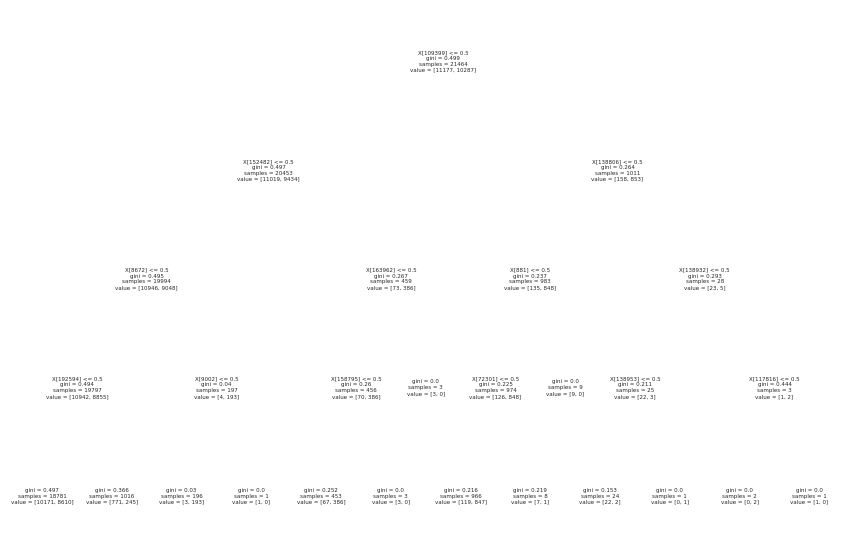

In [141]:
from sklearn import tree

tree.plot_tree(tree_model)
plt.savefig('hey.pdf')
plt.show()

In [142]:
from sklearn.metrics import confusion_matrix, classification_report

In [143]:
y_pred = tree_model.predict(X_cv_test)
test = np.array(y_test)
predictions = np.array(y_pred)
confusion_matrix(test, predictions)

array([[3735,   73],
       [2872,  475]])

In [144]:
from sklearn.metrics import accuracy_score, f1_score

print('accuracy:', accuracy_score(y_test,y_pred))
print('f1-score:', f1_score(y_test,y_pred))

accuracy: 0.5883997204751922
f1-score: 0.2439024390243902


In [160]:
acc_tree = accuracy_score(y_test,y_pred)

# **Predicting Sarcasm in Text Part VI**

## **it_nlunlpdj_04_enus_11**

### Tuning the model for better output & evaluating using different search methods

In [146]:
##Logistic regression

from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_cv_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [147]:
reg.score(X_cv_train, y_train)

0.9973909802459933

In [148]:
y_pred_reg = reg.predict(X_cv_test)
print('accuracy:', accuracy_score(y_test,y_pred_reg))
print('f1-score:', f1_score(y_test,y_pred_reg))

accuracy: 0.7942697414395528
f1-score: 0.7667194928684629


In [161]:
acc_log_reg = accuracy_score(y_test,y_pred_reg)

In [149]:
#SVM

from sklearn import svm
model = svm.SVC(kernel='linear', gamma=1) 
model.fit(X_cv_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [150]:
model.score(X_cv_train, y_train)

0.9993477450614984

In [151]:
y_pred_svm= model.predict(X_cv_test)
print('accuracy:', accuracy_score(y_test,y_pred_svm))
print('f1-score:', f1_score(y_test,y_pred_svm))

accuracy: 0.7828092243186583
f1-score: 0.7507218479307026


In [162]:
acc_svm = accuracy_score(y_test,y_pred_svm)

In [152]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier (criterion='gini',
                                n_estimators=12, 
                                random_state=1)
rf.fit(X_cv_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=12,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [153]:
rf.score(X_cv_train, y_train)

0.9844390607528886

In [155]:
y_pred_rf= rf.predict(X_cv_test)
print('accuracy:', accuracy_score(y_test,y_pred_rf))
print('f1-score:', f1_score(y_test,y_pred_rf))

accuracy: 0.7281621243885394
f1-score: 0.6493600144222101


In [163]:
acc_rf = accuracy_score(y_test,y_pred_rf)

In [156]:
#Naive Bayes

from sklearn.naive_bayes import MultinomialNB
naive_bayes=MultinomialNB()
naive_bayes.fit(X_cv_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [157]:
naive_bayes.score(X_cv_train, y_train)

0.994828550130451

In [158]:
y_pred_naive_bayes= naive_bayes.predict(X_cv_test)
print('accuracy:', accuracy_score(y_test,y_pred_naive_bayes))
print('f1-score:', f1_score(y_test,y_pred_naive_bayes))

accuracy: 0.796785464709993
f1-score: 0.7835020845741512


In [164]:
acc_naive_bayes = accuracy_score(y_test,y_pred_naive_bayes)

In [159]:
#Classification
print(classification_report(y_test,y_pred_naive_bayes))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      3808
           1       0.78      0.79      0.78      3347

    accuracy                           0.80      7155
   macro avg       0.80      0.80      0.80      7155
weighted avg       0.80      0.80      0.80      7155



Comparing accuracies of different models built


In [166]:
models_built = ['DesicionTree','Logistic_Regression','SVM', 'RandomForest', 'NaiveBayes']
columns = [acc_tree, acc_log_reg, acc_svm, acc_rf, acc_naive_bayes]
models_data = {'Models':models_built,'Accuracy':columns}
df = pd.DataFrame(models_data)
df

,Models,Accuracy
0,DesicionTree,0.588400
1,Logistic_Regression,0.794270
2,SVM,0.782809
3,RandomForest,0.728162
4,NaiveBayes,0.796785


<Figure size 360x360 with 0 Axes>

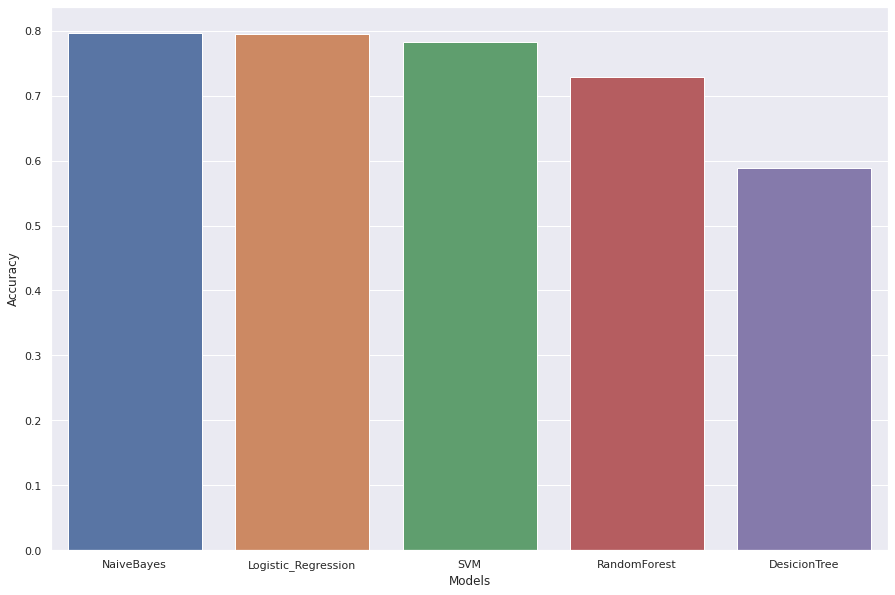

In [169]:
df = df.sort_values(by=['Accuracy'], axis = 0, ascending=False)

plt.figure(figsize=(5,5))
fig, ax = plt.subplots()
sns.barplot(x=df['Models'], y=df['Accuracy'], data=df);

----------------------------------------